# Inspect Where the Time Spent in the Deblender is Going

Specifically, look at the runtime as a function of footprint size and number of peaks.

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, AutoMinorLocator, FormatStrFormatter

import numpy as np
import lsst.daf.persistence as dafPersist

import lsst.afw.display as afwDisplay
import lsst.afw.display.utils as afwDisplayUtils
import lsst.afw.table as afwTable
# afwDisplay.setDefaultBackend("matplotlib")
afwDisplay.setDefaultBackend("ds9")
afwDisplay.setDefaultMaskTransparency(90)

from lsst.pipe.analysis.utils import concatenateCatalogs, orthogonalRegression
from lsst.pipe.analysis.plotUtils import plotTractOutline, plotPatchOutline

First setup a butler to the rerun directory of interest:

In [5]:
butlerDir = "/project/yusra/deblender-sprint/scarlet/w_2019_18_05k_noSym"
butler = dafPersist.Butler(butlerDir)

In [127]:
butlerDirNew = "/project/yusra/deblender-sprint/scarlet/w_2019_18_05k_noSym_demo"
butlerNew = dafPersist.Butler(butlerDirNew)

Specifiy the tract, patch, filter dataId for inspection

In [111]:
dataId = {"tract": 9813, "patch":"18,25", "filter":"HSC-I"}

Load in the "original" (orig) and "scarlet" (scar) catalogs

In [121]:
# measCat = butler.get("deepCoadd_meas", dataId=dataId)
refCat = butlerNew.get("deepCoadd_ref", dataId=dataId, immediate=True, flags=afwTable.SOURCE_IO_NO_HEAVY_FOOTPRINTS)
scarCat = butlerNew.get("deepCoadd_deblendedModel", dataId=dataId, immediate=True, flags=afwTable.SOURCE_IO_NO_HEAVY_FOOTPRINTS)
# print("len(mergedCat) = ", len(refCat), "len(measCat) = ", len(measCat), "len(scarCat) = ", len(scarCat))

It seems we have a mismatch in the catalog lengths.  See if this is due to scarlet quitting after N sources (as opposed to failing to write outputs for certain sources along the way)

In [122]:
ids = []
for i, scarSrc in enumerate(scarCat):
    ids.append(scarSrc["id"] - refCat[i]["id"])
print(np.sum(ids))

0


Yup, the entry IDs match for the first N=344 sources.  So, it seems scarlet quit after deblending the 344th source.  BUT, wait...are we being fooled by the id numbers?  Do other parameters agree?

In [123]:
for i in range(200, 220):
    print(scarCat[i]["id"] - refCat[i]["id"], "|", scarCat[i]["coord_ra"], refCat[i]["coord_ra"], "|", scarCat[i]["parent"], refCat[i]["parent"], "|", scarCat[i]["deblend_nChild"], refCat[i]["deblend_nChild"], "|", scarCat[i]["merge_peak_z"], refCat[i]["merge_peak_z"])

0 | nan rad 2.62811 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62806 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62809 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62824 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62831 rad | 0 0 | 0 0 | False False
0 | nan rad 2.6282 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62822 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62842 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62838 rad | 0 0 | 0 0 | False False
0 | nan rad 2.62847 rad | 43160611688808449 43160611688808449 | 0 0 | True True
0 | nan rad 2.62836 rad | 43160611688808449 43160611688808449 | 0 0 | True True
0 | nan rad 2.62842 rad | 43160611688808449 43160611688808449 | 0 0 | True True
0 | nan rad 2.62844 rad | 43160611688808449 43160611688808449 | 0 0 | True True
0 | nan rad 2.62838 rad | 43160611688808449 43160611688808449 | 0 0 | True True
0 | nan rad 2.62836 rad | 43160611688808449 43160611688808449 | 0 0 | True True
0 | nan rad 2.62847 rad | 43160611688808449 43160611688808449 | 0 0 | T

In [ ]:
scarCat.schema

In [124]:
for i, scarSrc in enumerate(scarCat):
    print(i, ": ", scarSrc["id"], scarSrc["parent"], scarSrc["deblend_nChild"], "{:.2f}".format(scarSrc["runtime"]), scarSrc["iterations"], scarSrc["deblend_failed"], scarSrc["deblend_skipped"])

0 :  43160611688808449 0 75 139626.72 81 False False
1 :  43160611688808451 0 0 0.00 0 False False
2 :  43160611688808452 0 90 249647.78 93 False False
3 :  43160611688808453 0 0 0.00 0 False False
4 :  43160611688808461 0 5 1163.21 31 False False
5 :  43160611688808473 0 3 2220.02 50 False False
6 :  43160611688808477 0 2 1257.02 67 False False
7 :  43160611688808492 0 10 5076.52 82 False False
8 :  43160611688808493 0 9 3699.12 74 False False
9 :  43160611688808496 0 4 5643.63 118 False False
10 :  43160611688808513 0 0 0.00 0 False False
11 :  43160611688808515 0 11 2647.21 57 False False
12 :  43160611688808517 0 130 1668886.00 200 False False
13 :  43160611688808519 0 4 3431.55 88 False False
14 :  43160611688808522 0 0 0.00 0 False False
15 :  43160611688808523 0 8 3189.45 56 False False
16 :  43160611688808525 0 0 0.00 0 False False
17 :  43160611688808527 0 0 0.00 0 False False
18 :  43160611688808528 0 0 0.00 0 False False
19 :  43160611688808533 0 6 1118.59 38 False False
20 

280 :  43160611688809109 43160611688808449 0 0.00 0 False False
281 :  43160611688809110 43160611688808449 0 0.00 0 False False
282 :  43160611688809111 43160611688808449 0 0.00 0 False False
283 :  43160611688809112 43160611688808449 0 0.00 0 False False
284 :  43160611688809113 43160611688808452 0 0.00 0 False False
285 :  43160611688809114 43160611688808452 0 0.00 0 False False
286 :  43160611688809115 43160611688808452 0 0.00 0 False False
287 :  43160611688809116 43160611688808452 0 0.00 0 False False
288 :  43160611688809117 43160611688808452 0 0.00 0 False False
289 :  43160611688809118 43160611688808452 0 0.00 0 False False
290 :  43160611688809119 43160611688808452 0 0.00 0 False False
291 :  43160611688809120 43160611688808452 0 0.00 0 False False
292 :  43160611688809121 43160611688808452 0 0.00 0 False False
293 :  43160611688809122 43160611688808452 0 0.00 0 False False
294 :  43160611688809123 43160611688808452 0 0.00 0 False False
295 :  43160611688809124 431606116888084

533 :  43160611688809362 43160611688808517 0 0.00 0 False False
534 :  43160611688809363 43160611688808517 0 0.00 0 False False
535 :  43160611688809364 43160611688808517 0 0.00 0 False False
536 :  43160611688809365 43160611688808517 0 0.00 0 False False
537 :  43160611688809366 43160611688808517 0 0.00 0 False False
538 :  43160611688809367 43160611688808517 0 0.00 0 False False
539 :  43160611688809368 43160611688808517 0 0.00 0 False False
540 :  43160611688809369 43160611688808517 0 0.00 0 False False
541 :  43160611688809370 43160611688808517 0 0.00 0 False False
542 :  43160611688809371 43160611688808517 0 0.00 0 False False
543 :  43160611688809372 43160611688808517 0 0.00 0 False False
544 :  43160611688809373 43160611688808517 0 0.00 0 False False
545 :  43160611688809374 43160611688808517 0 0.00 0 False False
546 :  43160611688809375 43160611688808517 0 0.00 0 False False
547 :  43160611688809376 43160611688808517 0 0.00 0 False False
548 :  43160611688809377 431606116888085

848 :  43160611688809677 43160611688808698 0 0.00 0 False False
849 :  43160611688809678 43160611688808765 0 0.00 0 False False
850 :  43160611688809679 43160611688808765 0 0.00 0 False False


In [113]:
footAreas = []
footPeaks = []
runtimes = []
iterations = []
failed = []
skipped = []
for src in scarCat:
    if src["parent"] == 0 and src["deblend_nChild"] > 0:
        footAreas.append(src.getFootprint().getArea())
        footPeaks.append(len(src.getFootprint().getPeaks()))
        runtimes.append(src["runtime"])
        iterations.append(src["iterations"])
        failed.append(src["deblend_failed"])
        skipped.append(src["deblend_skipped"])

In [114]:
footAreas[:9], footPeaks[:9], runtimes[:9], iterations[:9], failed[:9], skipped[:9]

([57575, 83134, 2915, 1815, 252, 2173, 4288, 989, 5016],
 [75, 90, 5, 3, 2, 10, 9, 4, 11],
 [139626.71875,
  249647.78125,
  1163.2115478515625,
  2220.020751953125,
  1257.0162353515625,
  5076.5244140625,
  3699.119140625,
  5643.62646484375,
  2647.20947265625],
 [81, 93, 31, 50, 67, 82, 74, 118, 57],
 [False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False])

In [115]:
src = scarCat[200]
fp = src.getFootprint()
fp.getArea(), len(fp.getPeaks())
for peak in fp.getPeaks():
    print(peak)

3487: (9391,12600)  (9391.000,12600.000)


In [116]:
exp = butlerNew.get("deepCoadd_calexp", dataId, immediate=True)

In [117]:
im = exp.maskedImage.image.array
med = np.nanmedian(im)
mad = np.nanmedian(abs(im - med))
imMin = med - 2.0*1.4826*mad
imMax = med + 5.0*1.4826*mad
print(med, mad, imMin, imMax)

0.011711842 0.019392492 -0.04579077563807368 0.15546838742680846


In [125]:
afwDisplay.setDefaultMaskTransparency(90)
disp = afwDisplay.Display(frame=1)
disp.scale("asinh", imMin, imMax, Q=8)
disp.mtv(exp)

In [126]:
with disp.Buffering():
    for i, src in enumerate(scarCat):
        fpCtype = afwDisplay.YELLOW
        peakCtype = afwDisplay.YELLOW
        if src["parent"] == 0 and src["deblend_nChild"] > 0:
            fpCtype = afwDisplay.GREEN
            peakCtype = afwDisplay.CYAN
        if src["parent"] > 0: # children
            fpCtype = afwDisplay.ORANGE
            peakCtype = afwDisplay.ORANGE
        if src["deblend_failed"] or src["deblend_skipped"]:
            fpCtype = afwDisplay.RED
            peakCtype = afwDisplay.MAGENTA
        if True:
            fp = src.getFootprint()
            afwDisplayUtils.drawBBox(fp.getBBox(), display=disp, ctype=fpCtype)
            if src["parent"] == 0 and src["deblend_nChild"] > 0:
                disp.dot("o", fp.getCentroid()[0], fp.getCentroid()[1], size=4, ctype=peakCtype)
            else:
                disp.dot("o", fp.getCentroid()[0], fp.getCentroid()[1], size=3, ctype=peakCtype)
            for p in fp.getPeaks()[1:]:
                disp.dot("x", p.getIx(), p.getIy(), size=3, ctype=peakCtype)
            # afwDisplayUtils.drawFootprint(fp, peaks=True, display=disp, ctype=fpCtype, ctypePeak=peakCtype)

In [8]:
patchList = ['15,8', '15,9', '15,10', '15,11', '15,12', '15,13', '15,14', '15,15', '15,16', '15,17', '15,18', '15,19', '15,20', '15,21', '15,22', '15,23', '15,24', '15,25', '15,26', '15,27', '15,28', '15,29', '15,30', '15,31', '16,8', '16,9', '16,10', '16,11', '16,12', '16,13', '16,14', '16,15', '16,16', '16,17', '16,18', '16,19', '16,20', '16,21', '16,22', '16,23', '16,24', '16,25', '16,26', '16,27', '16,28', '16,29', '16,30', '16,31', '17,8', '17,9', '17,10', '17,11', '17,12', '17,13', '17,14', '17,15', '17,16', '17,17', '17,18', '17,19', '17,20', '17,21', '17,22', '17,23', '17,24', '17,25', '17,26', '17,27', '17,28', '17,29', '17,30', '17,31', '18,8', '18,9', '18,10', '18,11', '18,12', '18,13', '18,14', '18,15', '18,16', '18,17', '18,18', '18,19', '18,20', '18,21', '18,22', '18,23', '18,24', '18,25', '18,26', '18,27', '18,28', '18,29', '18,30', '18,31', '19,8', '19,9', '19,10', '19,11', '19,12', '19,13', '19,14', '19,15', '19,16', '19,17', '19,18', '19,19', '19,20', '19,21', '19,22', '19,23', '19,24', '19,25', '19,26', '19,27', '19,28', '19,29', '19,30', '19,31', '20,8', '20,9', '20,10', '20,11', '20,12', '20,13', '20,14', '20,15', '20,16', '20,17', '20,18', '20,19', '20,20', '20,21', '20,22', '20,23', '20,24', '20,25', '20,26', '20,27', '20,28', '20,29', '20,30', '20,31', '21,8', '21,9', '21,10', '21,11', '21,12', '21,13', '21,14', '21,15', '21,16', '21,17', '21,18', '21,19', '21,20', '21,21', '21,22', '21,23', '21,24', '21,25', '21,26', '21,27', '21,28', '21,29', '21,30', '21,31', '22,8', '22,9', '22,10', '22,11', '22,12', '22,13', '22,14', '22,15', '22,16', '22,17', '22,18', '22,19', '22,20', '22,21', '22,22', '22,23', '22,24', '22,25', '22,26', '22,27', '22,28', '22,29', '22,30', '22,31', '23,8', '23,9', '23,10', '23,11', '23,12', '23,13', '23,14', '23,15', '23,16', '23,17', '23,18', '23,19', '23,20', '23,21', '23,22', '23,23', '23,24', '23,25', '23,26', '23,27', '23,28', '23,29', '23,30', '23,31', '24,8', '24,9', '24,10', '24,11', '24,12', '24,13', '24,14', '24,15', '24,16', '24,17', '24,18', '24,19', '24,20', '24,21', '24,22', '24,23', '24,24', '24,25', '24,26', '24,27', '24,28', '24,29', '24,30', '24,31', '25,8', '25,9', '25,10', '25,11', '25,12', '25,13', '25,14', '25,15', '25,16', '25,17', '25,18', '25,19', '25,20', '25,21', '25,22', '25,23', '25,24', '25,25', '25,26', '25,27', '25,28', '25,29', '25,30', '25,31', '26,8', '26,9', '26,10', '26,11', '26,12', '26,13', '26,14', '26,15', '26,16', '26,17', '26,18', '26,19', '26,20', '26,21', '26,22', '26,23', '26,24', '26,25', '26,26', '26,27', '26,28', '26,29', '26,30', '26,31', '27,8', '27,9', '27,10', '27,11', '27,12', '27,13', '27,14', '27,15', '27,16', '27,17', '27,18', '27,19', '27,20', '27,21', '27,23', '27,24', '27,25', '27,26', '27,28', '27,29', '27,30', '27,31', '28,8', '28,9', '28,10', '28,11', '28,12', '28,13', '28,14', '28,15', '28,16', '28,17', '28,18', '28,19', '28,20', '28,21', '28,22', '28,23', '28,25', '28,27', '28,28', '28,29', '28,30', '28,31', '29,8', '29,9', '29,10', '29,11', '29,12', '29,13', '29,14', '29,15', '29,16', '29,17', '29,18', '29,19', '29,20', '29,21', '29,22', '29,23', '29,24', '29,25', '29,26', '29,29', '29,31', '30,8', '30,9', '30,10', '30,11', '30,12', '30,13', '30,14', '30,15', '30,16', '30,17', '30,18', '30,19', '30,20', '30,21', '30,22', '30,24', '30,25', '30,29', '30,31', '31,8', '31,9', '31,10', '31,11', '31,12', '31,13', '31,14', '31,15', '31,19', '31,20']

In [80]:
patchListShort = ['15,8', '15,9', '15,10', '15,11', '15,12', '15,13', '15,14', '15,15', '16,8', '16,9', '16,10', '16,11', '16,12', '16,13', '16,14', '16,15', '17,8', '17,9', '17,10', '17,11', '17,12', '17,13', '17,14', '17,15', '18,8', '18,9', '18,10', '18,11', '18,12', '18,13', '18,14', '18,15', '19,8', '19,9', '19,10', '19,11', '19,12', '19,13', '19,14', '19,15']

In [129]:
skymap = butlerNew.get("deepCoadd_skyMap")
tractInfo = skymap[dataId["tract"]]
patchList = []
catList = []
patchId = dataId.copy()
if True:
    nPatchX, nPatchY = tractInfo.getNumPatches()
    print("Searching for data in {0:}{1:} patches".format(nPatchX, nPatchY))
    minPatchX, maxPatchX = 15, 31
    minPatchY, maxPatchY = 8, 31
    # for iPatchX in range(nPatchX):
    #    for iPatchY in range(nPatchY):
    for iPatchX in range(minPatchX, maxPatchX + 1):
        for iPatchY in range(minPatchY, maxPatchY + 1):
            patchId["patch"] = "%d,%d" % (iPatchX, iPatchY)
            if butlerNew.datasetExists("deepCoadd_deblendedModel", dataId=patchId):
                patchList.append(patchId["patch"])
                cat = butlerNew.get("deepCoadd_deblendedModel", dataId=patchId, immediate=True, flags=afwTable.SOURCE_IO_NO_HEAVY_FOOTPRINTS)
                catList.append(cat)
    print(patchList)
else: 
    for patch in patchListShort:
        patchId["patch"] = patch
        if butlerNew.datasetExists("deepCoadd_deblendedModel", dataId=patchId):
            patchList.append(patchId["patch"])
            cat = butlerNew.get("deepCoadd_deblendedModel", dataId=patchId, immediate=True, flags=afwTable.SOURCE_IO_NO_HEAVY_FOOTPRINTS)
            catList.append(cat)

Searching for data in 6666 patches
['15,8', '15,9', '15,11', '15,12', '15,13', '15,19', '15,20', '15,21', '15,22', '15,23', '15,24', '15,25', '15,26', '15,27', '15,28', '15,29', '15,30', '15,31', '16,9', '16,11', '16,13', '18,19', '18,21', '18,22', '18,23', '18,24', '18,25', '18,26', '18,27', '18,30', '18,31', '19,8', '19,9', '19,10', '19,11', '19,12', '19,13', '19,14', '19,15', '19,18', '19,19', '19,20', '19,21', '19,22', '19,23', '19,24', '19,25', '20,9', '20,10', '20,13', '21,26', '21,30', '21,31', '22,8', '22,9', '22,10', '22,11', '22,12', '22,13', '22,14', '22,15', '22,16', '22,18', '22,19', '22,20', '22,21', '22,22', '22,23', '22,24', '22,26', '22,30', '22,31', '23,8', '23,9', '23,10', '23,11', '23,12', '23,13', '23,14', '23,15', '23,16', '23,17', '23,19', '23,20', '23,21', '25,11', '25,12', '25,13', '25,14', '25,15', '25,16', '25,17', '25,21', '25,23', '25,24', '25,25', '25,26', '25,27', '25,29', '26,8', '26,9', '26,10', '26,11', '26,12', '26,13', '26,14', '26,16', '26,19', '26,

In [130]:
tractCat = concatenateCatalogs(catList)

In [3]:
skymap = butler.get("deepCoadd_skyMap")
tractInfo = skymap[dataId["tract"]]

NameError: name 'butler' is not defined

In [ ]:
tractCatRead = afwTable.SourceCatalog.readFits("/home/lauren/LSST/demo_deblender_sprint/bin/fullTractCatalog1.fits")

In [131]:
footAreas = []
footPeaks = []
runtimes = []
iterations = []
failed = []
skipped = []
for src in tractCat:
    if src["parent"] == 0 and src["deblend_nChild"] > 0:
        footAreas.append(src.getFootprint().getArea())
        footPeaks.append(len(src.getFootprint().getPeaks()))
        runtimes.append(src["runtime"])
        iterations.append(src["iterations"])
        failed.append(src["deblend_failed"])
        skipped.append(src["deblend_skipped"])
# convert from milliseconds to seconds
# runtimes[:] = [runtime/1000.0 for runtime in runtimes]

In [86]:
def plotScatterAndHists(tractInfo, patchList, footParam, timeParam, footParamStr, timeParamStr, nBins=10, outFileStr=None):
    nullfmt = NullFormatter()  # no labels for histograms
    left, width = 0.12, 0.58
    bottom, height = 0.10, 0.58
    left_h = left + width + 0.03
    bottom_h = bottom + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.23]
    rect_histy = [left_h, bottom, 0.20, height]
    rect_histy = [left_h, bottom, 0.18, height]
    topRight = [left_h - 0.01, bottom_h, 0.23, 0.23]

    # start with a rectangular Figure
    plt.figure(1, figsize=(10, 10))
    axScatter = plt.axes(rect_scatter)

    bins = np.logspace(0.001, 7, num=nBins)
    axTopRight = plt.axes(topRight)
    axTopRight.set_aspect("equal")
    plotTractOutline(axTopRight, tractInfo, patchList, fontSize=4, maxDegBeyondPatch=0.02)

    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    axHistx.tick_params(which="both", direction="in", top=True, right=True, labelsize=8)
    axHisty.tick_params(which="both", direction="in", top=True, right=True, labelsize=8)
    # no labels for histograms
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    
    axScatter.tick_params(which="both", direction="in", labelsize=12)
    axScatter.set_xlabel(footParamStr, fontSize=15)
    axScatter.set_ylabel(timeParamStr, fontSize=15)
    axScatter.set_xlim(0.5*min(footParam), 2.25*max(footParam))
    axScatter.set_ylim(0.5*min(timeParam), 2.25*max(timeParam))
    axScatter.set_xscale("log", nonposx="clip")
    axScatter.set_yscale("log", nonposy="clip")
    dataPoints = []
    dataPoints.append(axScatter.scatter(footParam, timeParam, s=10, alpha=0.3, label=footParamStr, marker="o"))
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    for iFit in [2, ]:
        color = colors[iFit%len(colors)]
        xFitLine, yOrthFitLine, yPolyFitLine = doPloyFit(footParam, timeParam, order=iFit)
        orthFitLine = axScatter.plot(xFitLine, yOrthFitLine, color=color, alpha=1, label="Orthogonal Regression order={:}".format(iFit))
        dataPoints.append(orthFitLine[0])
        polyFitLine = axScatter.plot(xFitLine, yPolyFitLine, "g--", color=color, alpha=0.8, label="Polynomial order={:}".format(iFit))
        dataPoints.append(polyFitLine[0])

    axHistx.tick_params(axis="x", which="major", direction="in", length=5)
    axHistx.xaxis.set_minor_locator(AutoMinorLocator(2))
    axHisty.tick_params(axis="y", which="major", direction="in", length=5)
    axHisty.yaxis.set_minor_locator(AutoMinorLocator(2))

    axScatter.tick_params(which="major", direction="in", length=5)

    # Compute cumulative runtime as a function of footParam
    # footParamArr = np.array(footParam.copy())
    timeParamArr = np.array(timeParam.copy())
    digitized = np.digitize(footParam, bins)
    binSumsRuntime = [timeParamArr[digitized == iBin].sum() for iBin in range(1, len(bins))]
    cumulativeRuntime = np.zeros_like(bins)
    for i in range(0, len(cumulativeRuntime)):
        for j in range(i):
            cumulativeRuntime[i - 1] += binSumsRuntime[j]
    cumulativeRuntime /= timeParamArr.sum()
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    axHistx.set_xscale("log", nonposx="clip")
    axHistx.set_yscale("log", nonposy="clip")
    axHisty.set_xscale("log", nonposx="clip")
    axHisty.set_yscale("log", nonposy="clip")
    
    axHistx.hist(footParam, bins=bins, alpha=0.6)
    axHisty.hist(timeParam, bins=bins, orientation="horizontal", alpha=0.5)
    
    axHistx2 = axHistx.twinx()  # instantiate a second axes that shares the same x-axis
    axHistx2.plot(bins, cumulativeRuntime, color="tab:orange", label="Cum Frac (runtime)")
    axHistx2.hist(footParam, bins=bins, density=True, log=False, color="b", label="Cum Frac (xParam)", histtype="step", cumulative=1)
    axHistx2.set_ylim(0, 1.05)
    axHistx2.tick_params(axis="y", which="both", direction="in")
    #axHistx2.set_ylabel("Cumulative Fraction", rotation=270, labelpad=12, color="b")
    axHistx2.legend(loc="right")
    axHistx2.grid(True, "both", color="black", alpha=0.3)
  
    # axHisty2 = axHisty.twiny()  # instantiate a second axes that shares the same x-axis
    # axHisty2.hist(footParam, bins=bins, orientation="horizontal", density=True, log=False, color="b", label="Cumulative Fraction", histtype="step", cumulative=1)
    # axHisty2.set_xlim(0, 1.05)
    # axHisty2.tick_params(axis="x", which="both", direction="in")
    # #axHisty2.set_ylabel("Cumulative Fraction", rotation=270, labelpad=12, color="b")
    # #axHisty2.legend(loc="right")
    # axHisty2.grid(True, "both", color="black", alpha=0.3)
 
    axScatter.legend(handles=dataPoints, loc=2, fontsize=12)
    if outFileStr:
        plt.savefig(outFileStr + ".png", dpi=120)

Total Number of Data points: 9504
Number of data points in polynomial fit: 8692
Polynomial Fit Coeffs: [1.48879515e-05 7.37251887e-01 1.00780114e+03]
Number of data points in Orthogonal Regression fit: 8692
Orthogonal Regression Coeffs: [1.403950069882468e-05, 0.8560773608758158, 795.5684648544867]


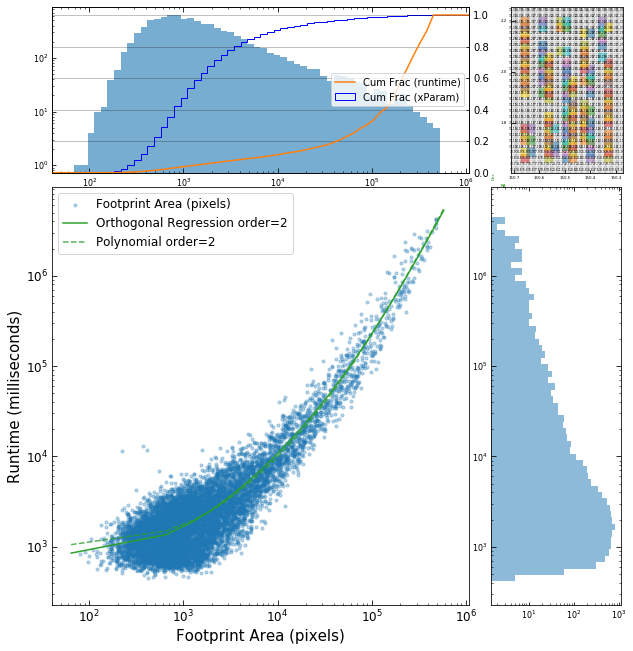

In [136]:
plotScatterAndHists(tractInfo, patchList, footAreas, runtimes, "Footprint Area (pixels)", "Runtime (milliseconds)", nBins=100, outFileStr="RuntimeVsFootprintArea")

Total Number of Data points: 9504
Number of data points in polynomial fit: 8320
Polynomial Fit Coeffs: [  33.19507052  110.32943848 1060.12915394]
Number of data points in Orthogonal Regression fit: 8320
Orthogonal Regression Coeffs: [15.692306021116535, 692.9998581370938, -721.6642678983322]


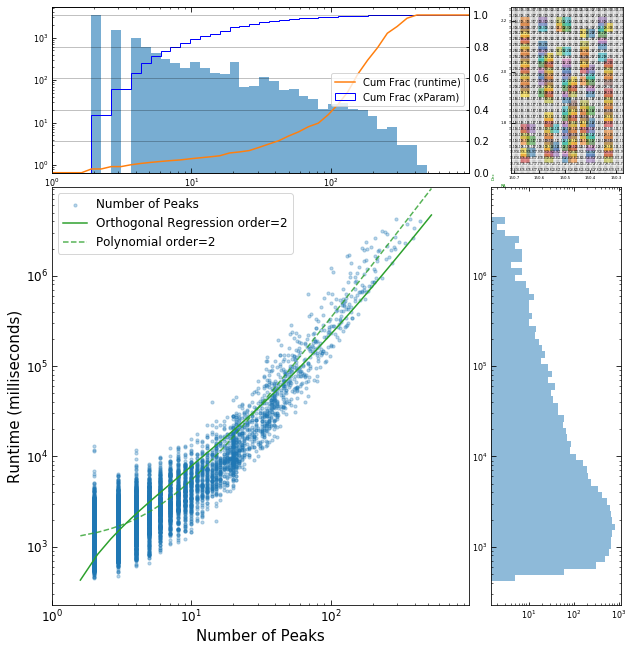

In [135]:
plotScatterAndHists(tractInfo, patchList, footPeaks, runtimes, "Number of Peaks", "Runtime (milliseconds)", nBins=100, outFileStr="RuntimeVsNPeaks")

In [18]:
def doPloyFit(x, y, order=2, iterations=3, rej=5.0):
    xx = np.array(x.copy())
    yy = np.array(y.copy())
    keep = np.ones_like(xx, dtype=bool)
    for ii in range(iterations):
        polyCoeffs = np.polyfit(xx[keep], yy[keep], order)
        dy = yy - np.polyval(polyCoeffs, xx)
        q1, q3 = np.percentile(dy[keep], [25, 75])
        # The difference between q3 and q1 is the interquartile distance.
        # 0.74*interquartileDistance is an estimate of standard deviation.
        clip = rej*0.74*(q3 - q1)
        keep = np.logical_not(np.abs(dy) > clip)

    nTotal = len(xx)
    print("Total Number of Data points: {:}".format(nTotal))
    nKeep = np.sum(keep)
    if nKeep < order:
        raise RuntimeError("Not enough good data points ({0:d}) for polynomial fit of order {1:d}".format(nKeep, order))
    xLine = np.linspace(0.8*min(xx), 1.2*max(xx), 1000)
    polyCoeffs = np.polyfit(xx[keep], yy[keep], order)
    yPolyFitLine = np.polyval(polyCoeffs, xLine)
    print("Number of data points in polynomial fit: {:d}".format(nKeep))
    print("Polynomial Fit Coeffs: {:}".format(polyCoeffs))
    initialGuess = list(reversed(polyCoeffs))
    keepOdr = keep.copy()
    orthRegCoeffs = orthogonalRegression(xx[keepOdr], yy[keepOdr], order, initialGuess)
    for ii in range(iterations - 1):
        initialGuess = list(reversed(orthRegCoeffs))
        dy = yy - np.polyval(orthRegCoeffs, xx)
        q1, q3 = np.percentile(dy[keepOdr], [25, 75])
        clip = rej*0.74*(q3 - q1)
        keepOdr = np.logical_not(np.abs(dy) > clip) & np.isfinite(xx) & np.isfinite(yy)
        nKeepOdr = np.sum(keepOdr)
        if nKeepOdr < order:
            raise RuntimeError(
                "Not enough good data points ({0:d}) for polynomial fit of order {1:d}".
                format(nKeepOdr, order))
        orthRegCoeffs = orthogonalRegression(xx[keepOdr], yy[keepOdr], order, initialGuess)
    nKeepOdr = np.sum(keepOdr)
    print("Number of data points in Orthogonal Regression fit: {:d}".format(nKeep))
    print("Orthogonal Regression Coeffs: {:}".format(orthRegCoeffs))
    xLine = np.linspace(0.8*min(xx), 1.2*max(xx), 1000)
    yOrthFitLine = np.polyval(orthRegCoeffs, xLine)
    
    return xLine, yOrthFitLine, yPolyFitLine


In [229]:
xFitLine, yOrthFitLine, yPolyFitLine = doPloyFit(footAreas, runtimes, order=2)

Total Number of Data points: 16427
Number of data points in polynomial fit: 14947
Polynomial Fit Coeffs: [1.43151940e-05 3.26163425e-01 1.56581960e+03]
Number of data points in Orthogonal Regression fit: 14947
Orthogonal Regression Coeffs: [9.106565227172235e-06, 0.7217566526399215, 962.2142742437609]


In [166]:
poly = np.polyfit(footAreas, runtimes, 2)

In [167]:
poly

array([ 2.92285562e-05, -1.70266642e+00,  8.55676201e+03])